In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Data Set

In [2]:
df = pd.read_csv("/kaggle/input/electric-vehicle-population-dataset/Electric_Vehicle_Population_Data.csv")

In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         191407 non-null  object 
 1   County                                             191403 non-null  object 
 2   City                                               191403 non-null  object 
 3   State                                              191407 non-null  object 
 4   Postal Code                                        191403 non-null  float64
 5   Model Year                                         191407 non-null  int64  
 6   Make                                               191407 non-null  object 
 7   Model                                              191407 non-null  object 
 8   Electric Vehicle Type                              191407 non-null  object

In [5]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [6]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 414
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [7]:
df.shape

(191407, 17)

# Handle Outliers

In [8]:
# Outliers can only be in the columns which have int or float dtype
df_float = df.select_dtypes(include="float64").columns

In [9]:
df_float

Index(['Postal Code', 'Legislative District', '2020 Census Tract'], dtype='object')

In [10]:
for i in df_float:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5*(iqr)
    upper_bound = q3 + 1.5 * (iqr)

    outliers = df[(df[i]<lower_bound) | (df[i] > upper_bound)]
    data_clean = df[~df.index.isin(outliers.index)]
    print(len(outliers),df.shape)

11888 (191407, 17)
0 (191407, 17)
465 (191407, 17)


In [11]:
df.shape

(191407, 17)

In [12]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 414
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

# Handling Missing Values

In [13]:
df_with_null_values = []
for i in df.columns:
    if df[i].isnull().sum() != 0:
        df_with_null_values.append(i)

In [14]:
df_with_null_values

['County',
 'City',
 'Postal Code',
 'Legislative District',
 'Vehicle Location',
 'Electric Utility',
 '2020 Census Tract']

In [15]:
# Replacing the null values with mode values of every columns
for i in df_with_null_values:
    mode = df[i].mode()
    print(mode)
for i in df:
    df[i].fillna(mode[0],inplace=True)
df.isnull().sum()

0    King
Name: County, dtype: object
0    Seattle
Name: City, dtype: object
0    98052.0
Name: Postal Code, dtype: float64
0    41.0
Name: Legislative District, dtype: float64
0    POINT (-122.1207376 47.6705374)
Name: Vehicle Location, dtype: object
0    PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
Name: Electric Utility, dtype: object
0    5.303303e+10
Name: 2020 Census Tract, dtype: float64


/tmp/ipykernel_18/3272369127.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(mode[0],inplace=True)


VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         191407 non-null  object 
 1   County                                             191407 non-null  object 
 2   City                                               191407 non-null  object 
 3   State                                              191407 non-null  object 
 4   Postal Code                                        191407 non-null  float64
 5   Model Year                                         191407 non-null  int64  
 6   Make                                               191407 non-null  object 
 7   Model                                              191407 non-null  object 
 8   Electric Vehicle Type                              191407 non-null  object

In [17]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


In [18]:
df.shape

(191407, 17)

In [19]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

### Till here data don't have any Null values, Any Outliers

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         191407 non-null  object 
 1   County                                             191407 non-null  object 
 2   City                                               191407 non-null  object 
 3   State                                              191407 non-null  object 
 4   Postal Code                                        191407 non-null  float64
 5   Model Year                                         191407 non-null  int64  
 6   Make                                               191407 non-null  object 
 7   Model                                              191407 non-null  object 
 8   Electric Vehicle Type                              191407 non-null  object

In [21]:
df["Base MSRP"].unique()

array([     0,  36900,  32250,  69900,  52650,  64950,  54950,  52900,
        45600,  53400,  59900, 110950,  31950,  81100,  39995,  91250,
        33950,  98950,  90700,  44100,  55700,  34995,  43700,  36800,
       184400,  89100, 102000,  75095, 109000,  32995, 845000])

### Data Type Conversion

In [22]:
list_to_convert_dtypes = ["Postal Code","Model Year","Electric Range","Base MSRP","Legislative District","DOL Vehicle ID","2020 Census Tract"]
for i in list_to_convert_dtypes:
  df[i] = df[i].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   VIN (1-10)                                         191407 non-null  object
 1   County                                             191407 non-null  object
 2   City                                               191407 non-null  object
 3   State                                              191407 non-null  object
 4   Postal Code                                        191407 non-null  int64 
 5   Model Year                                         191407 non-null  int64 
 6   Make                                               191407 non-null  object
 7   Model                                              191407 non-null  object
 8   Electric Vehicle Type                              191407 non-null  object
 9   Clea

In [24]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033006500
1,3MW39FS05R,Yakima,Zillah,WA,98953,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,53077002201
2,1N4AZ0CP0F,King,Kent,WA,98031,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033029306
3,5YJSA1H20F,Snohomish,Bothell,WA,98012,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,53061052107
4,JTMAB3FV1N,Yakima,Yakima,WA,98908,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14,221023589,POINT (-120.611068 46.596645),PACIFICORP,53077000902


# Conversion of Categorical Variables using LabelEncoding

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] = label_encoder.fit_transform(df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"])
df["Electric Vehicle Type"] = label_encoder.fit_transform(df["Electric Vehicle Type"])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   VIN (1-10)                                         191407 non-null  object
 1   County                                             191407 non-null  object
 2   City                                               191407 non-null  object
 3   State                                              191407 non-null  object
 4   Postal Code                                        191407 non-null  int64 
 5   Model Year                                         191407 non-null  int64 
 6   Make                                               191407 non-null  object
 7   Model                                              191407 non-null  object
 8   Electric Vehicle Type                              191407 non-null  int64 
 9   Clea

# Feature Engineering

In [27]:
# Vehicle Location can be converted into x coordinates and y coordinates  ----> Feature Engineering

df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112,2019,TESLA,MODEL S,0,0,270,0,43,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033006500
1,3MW39FS05R,Yakima,Zillah,WA,98953,2024,BMW,330E,1,2,20,0,15,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,53077002201
2,1N4AZ0CP0F,King,Kent,WA,98031,2015,NISSAN,LEAF,0,0,84,0,11,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033029306
3,5YJSA1H20F,Snohomish,Bothell,WA,98012,2015,TESLA,MODEL S,0,0,208,0,1,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,53061052107
4,JTMAB3FV1N,Yakima,Yakima,WA,98908,2022,TOYOTA,RAV4 PRIME,1,0,42,0,14,221023589,POINT (-120.611068 46.596645),PACIFICORP,53077000902


In [28]:

df["Vehicle Location"][0]

coordinate_string = df["Vehicle Location"][0].replace("POINT (","").replace(")","")

longitude , latitude = map(float,coordinate_string.split())

print(longitude)
print(latitude)

-122.300312
47.629782


In [29]:
df["Vehicle Location"].head()

0      POINT (-122.300312 47.629782)
1    POINT (-120.2658133 46.4063477)
2      POINT (-122.201564 47.402358)
3      POINT (-122.206146 47.839957)
4      POINT (-120.611068 46.596645)
Name: Vehicle Location, dtype: object

In [30]:
df[["X_Coordinate","Y_Coordinate"]] = df["Vehicle Location"].str.extract(r'POINT \(([-\d.]+) ([\d.]+)\)')
df["X_Coordinate"] = pd.to_numeric(df["X_Coordinate"],errors='coerce')
df["Y_Coordinate"] = pd.to_numeric(df["Y_Coordinate"],errors='coerce')

In [31]:
df.drop(["Vehicle Location"],axis=1)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,X_Coordinate,Y_Coordinate
0,5YJSA1E22K,King,Seattle,WA,98112,2019,TESLA,MODEL S,0,0,270,0,43,202233958,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033006500,-122.300312,47.629782
1,3MW39FS05R,Yakima,Zillah,WA,98953,2024,BMW,330E,1,2,20,0,15,264425178,PACIFICORP,53077002201,-120.265813,46.406348
2,1N4AZ0CP0F,King,Kent,WA,98031,2015,NISSAN,LEAF,0,0,84,0,11,114962025,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033029306,-122.201564,47.402358
3,5YJSA1H20F,Snohomish,Bothell,WA,98012,2015,TESLA,MODEL S,0,0,208,0,1,232724670,PUGET SOUND ENERGY INC,53061052107,-122.206146,47.839957
4,JTMAB3FV1N,Yakima,Yakima,WA,98908,2022,TOYOTA,RAV4 PRIME,1,0,42,0,14,221023589,PACIFICORP,53077000902,-120.611068,46.596645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191402,5YJ3E1EA0K,Pierce,Sumner,WA,98390,2019,TESLA,MODEL 3,0,0,220,0,31,314927896,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53053073302,-122.233785,47.205597
191403,JN1BF0BA7P,Pierce,Wilkeson,WA,98396,2023,NISSAN,ARIYA,0,1,0,0,31,236213120,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53053070206,-122.047854,47.107559
191404,7SAYGDEE4R,King,Fall City,WA,98024,2024,TESLA,MODEL Y,0,1,0,0,5,261335896,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032601,-121.903093,47.567116
191405,7SAXCBE65N,Grays Harbor,Aberdeen,WA,98520,2022,TESLA,MODEL X,0,1,0,0,19,219273491,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,53027001100,-123.807422,46.978243


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 19 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         191407 non-null  object 
 1   County                                             191407 non-null  object 
 2   City                                               191407 non-null  object 
 3   State                                              191407 non-null  object 
 4   Postal Code                                        191407 non-null  int64  
 5   Model Year                                         191407 non-null  int64  
 6   Make                                               191407 non-null  object 
 7   Model                                              191407 non-null  object 
 8   Electric Vehicle Type                              191407 non-null  int64 

In [33]:
df["X_Coordinate"].median()

-122.2753318

In [34]:
df['X_Coordinate']  = df["X_Coordinate"].fillna(df["X_Coordinate"].median())
df['Y_Coordinate']  = df["Y_Coordinate"].fillna(df["Y_Coordinate"].median())

In [35]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
X_Coordinate                                         0
Y_Coordina

In [36]:

df["X_Coordinate"] = df["X_Coordinate"].astype(int)
df["Y_Coordinate"] = df["Y_Coordinate"].astype(int)


In [37]:
df = df.drop("Vehicle Location",axis=1)

In [38]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,X_Coordinate,Y_Coordinate
0,5YJSA1E22K,King,Seattle,WA,98112,2019,TESLA,MODEL S,0,0,270,0,43,202233958,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033006500,-122,47
1,3MW39FS05R,Yakima,Zillah,WA,98953,2024,BMW,330E,1,2,20,0,15,264425178,PACIFICORP,53077002201,-120,46
2,1N4AZ0CP0F,King,Kent,WA,98031,2015,NISSAN,LEAF,0,0,84,0,11,114962025,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033029306,-122,47
3,5YJSA1H20F,Snohomish,Bothell,WA,98012,2015,TESLA,MODEL S,0,0,208,0,1,232724670,PUGET SOUND ENERGY INC,53061052107,-122,47
4,JTMAB3FV1N,Yakima,Yakima,WA,98908,2022,TOYOTA,RAV4 PRIME,1,0,42,0,14,221023589,PACIFICORP,53077000902,-120,46


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 18 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   VIN (1-10)                                         191407 non-null  object
 1   County                                             191407 non-null  object
 2   City                                               191407 non-null  object
 3   State                                              191407 non-null  object
 4   Postal Code                                        191407 non-null  int64 
 5   Model Year                                         191407 non-null  int64 
 6   Make                                               191407 non-null  object
 7   Model                                              191407 non-null  object
 8   Electric Vehicle Type                              191407 non-null  int64 
 9   Clea

# Visualisation


In [40]:
df = pd.read_csv("/kaggle/input/electric-vehicle-population-dataset/Electric_Vehicle_Population_Data.csv")

In [41]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


### top 20 County with Electric Vechicle Manufactured

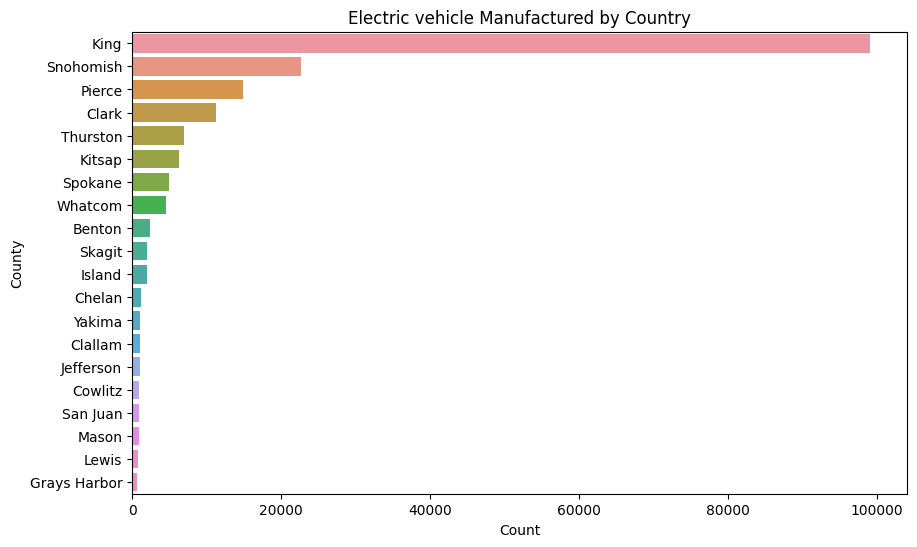

In [42]:
top_20_counties = df["County"].value_counts().nlargest(20).index

df_top_20 = df[df["County"].isin(top_20_counties)]

plt.figure(figsize=(10,6))
sns.countplot(data=df_top_20,y="County",order=top_20_counties)
plt.title("Electric vehicle Manufactured by Country")
plt.xlabel("Count")
plt.ylabel("County")
plt.show()

In [43]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [44]:
df["Electric Vehicle Type"]

0                 Battery Electric Vehicle (BEV)
1         Plug-in Hybrid Electric Vehicle (PHEV)
2                 Battery Electric Vehicle (BEV)
3                 Battery Electric Vehicle (BEV)
4         Plug-in Hybrid Electric Vehicle (PHEV)
                           ...                  
191402            Battery Electric Vehicle (BEV)
191403            Battery Electric Vehicle (BEV)
191404            Battery Electric Vehicle (BEV)
191405            Battery Electric Vehicle (BEV)
191406            Battery Electric Vehicle (BEV)
Name: Electric Vehicle Type, Length: 191407, dtype: object

In [45]:
df["Electric Vehicle Type"] = df["Electric Vehicle Type"].str.extract(r'\(([^)]+)\)')

In [46]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,BEV,Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,PHEV,Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,BEV,Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,BEV,Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,PHEV,Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


In [47]:
df["Electric Range"].sort_values().unique()

df = df[df["Electric Range"]>0]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


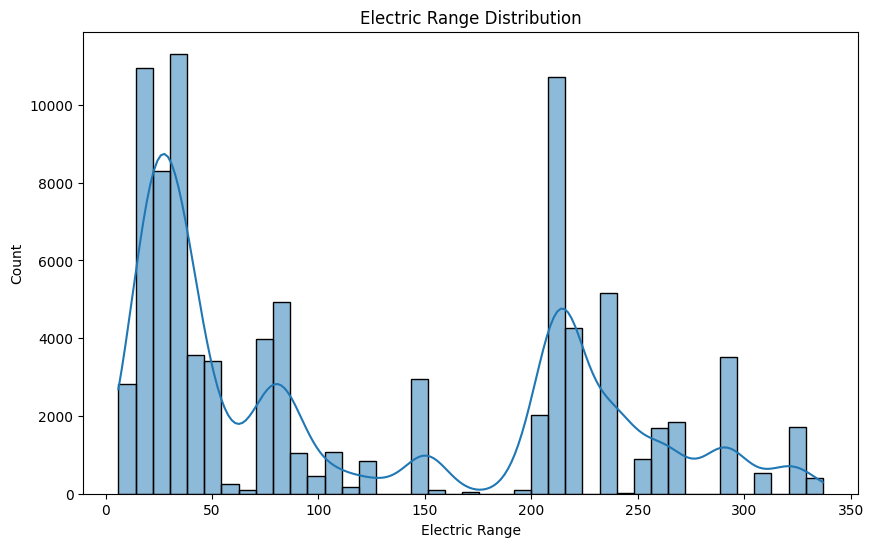

In [48]:
plt.figure(figsize=(10,6))
plt.title('Electric Range Distribution')
sns.histplot(df['Electric Range'], kde=True)
plt.show()


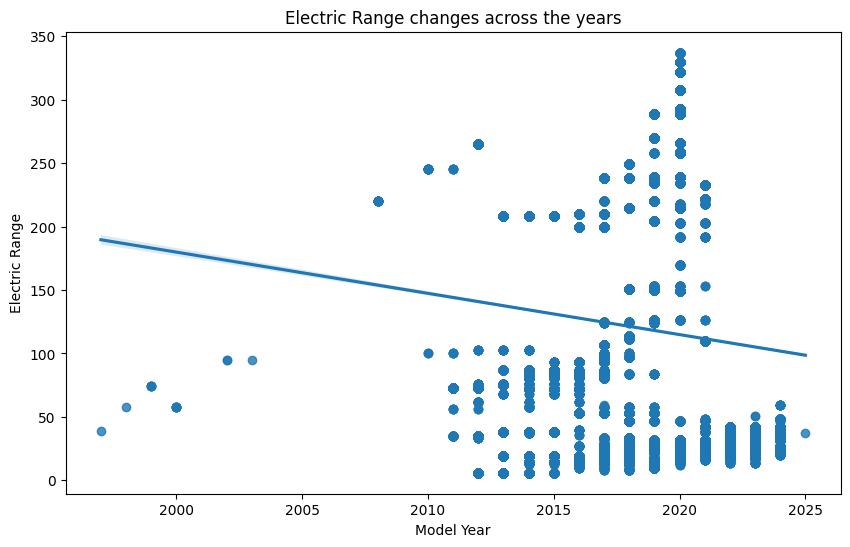

In [49]:
plt.figure(figsize=(10,6))
plt.title("Electric Range changes across the years")
sns.regplot(data=df,x="Model Year",y="Electric Range")
plt.show()

# regplot ----> Plot data and a linear regression model fit.

In [50]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [51]:
df["Models per make"] = df.groupby('Make')["Model"].transform("nunique")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Models per make
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,BEV,Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,5
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,PHEV,Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10,11
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,BEV,Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,1
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,BEV,Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10,5
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,PHEV,Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10,4


In [52]:
def top_make(data, sort_by, top_n):

  grouped = df.groupby("Make")["Electric Range"].agg(["count","mean"]).reset_index()

  sorted_grouped = grouped.sort_values(by=sort_by,ascending=False)

  return sorted_grouped.head(top_n)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


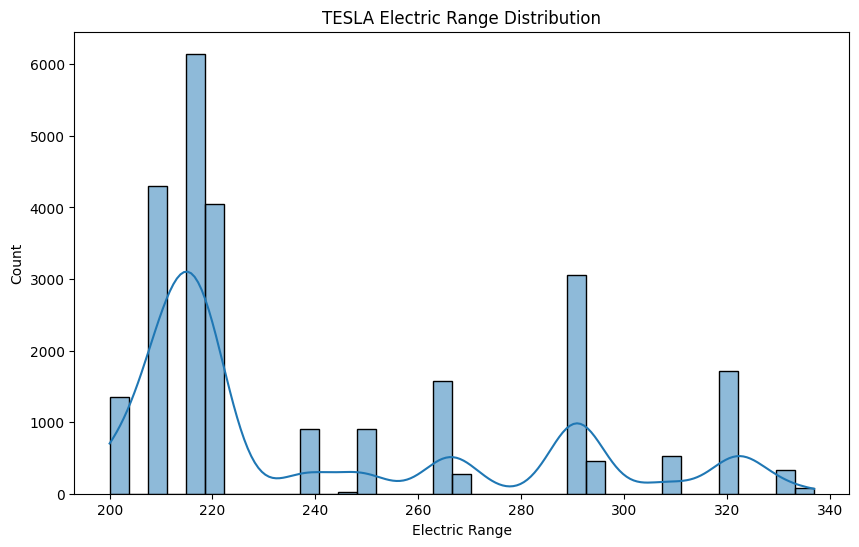

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


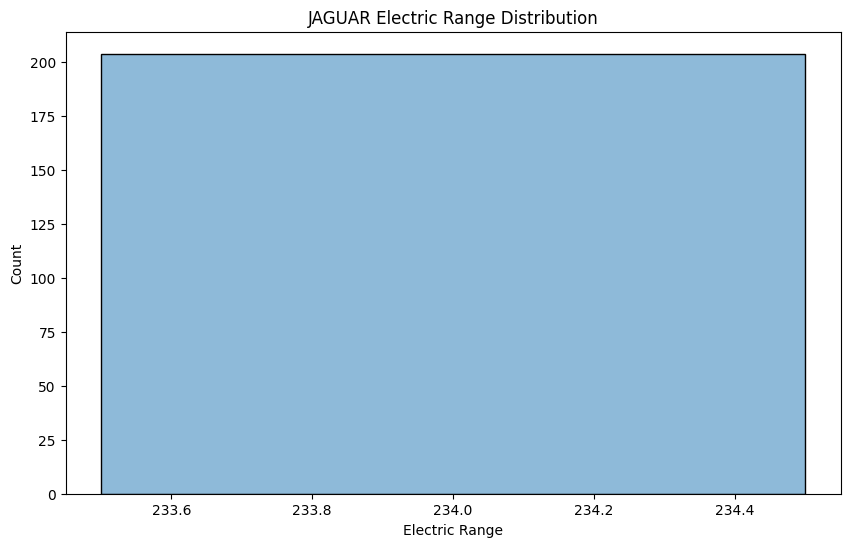

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


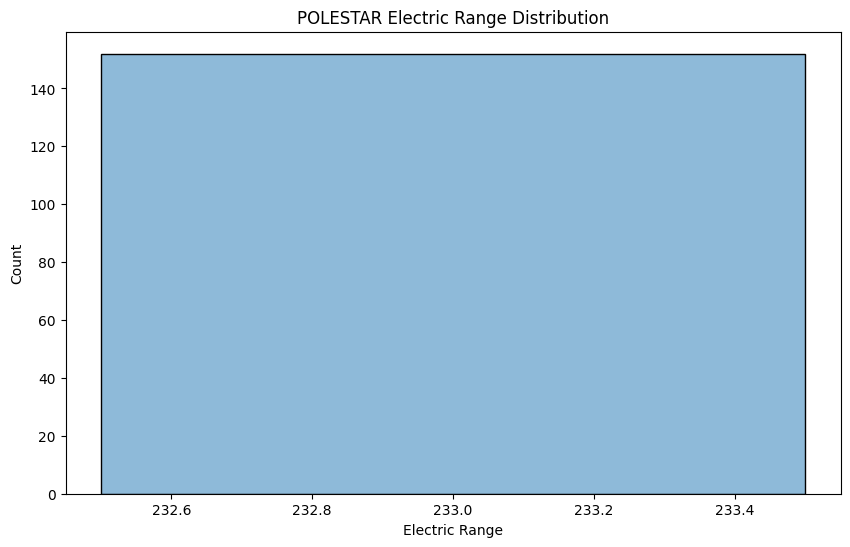

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


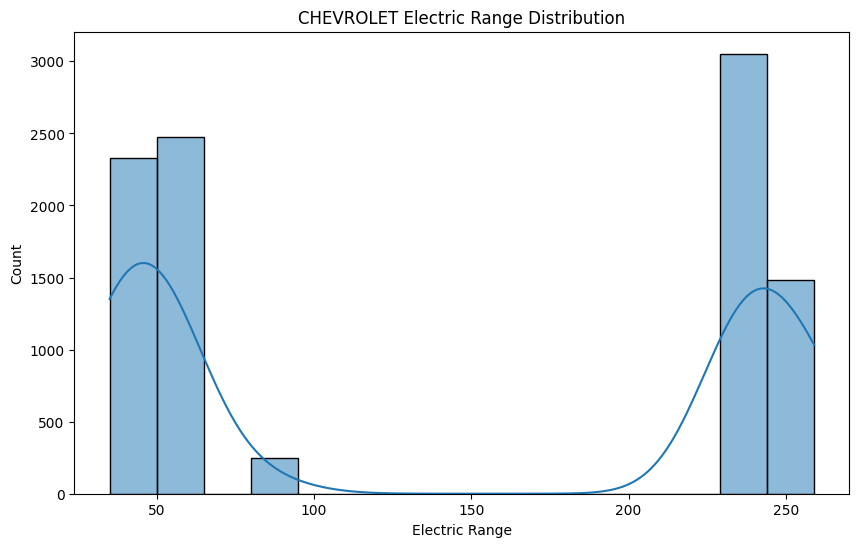

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


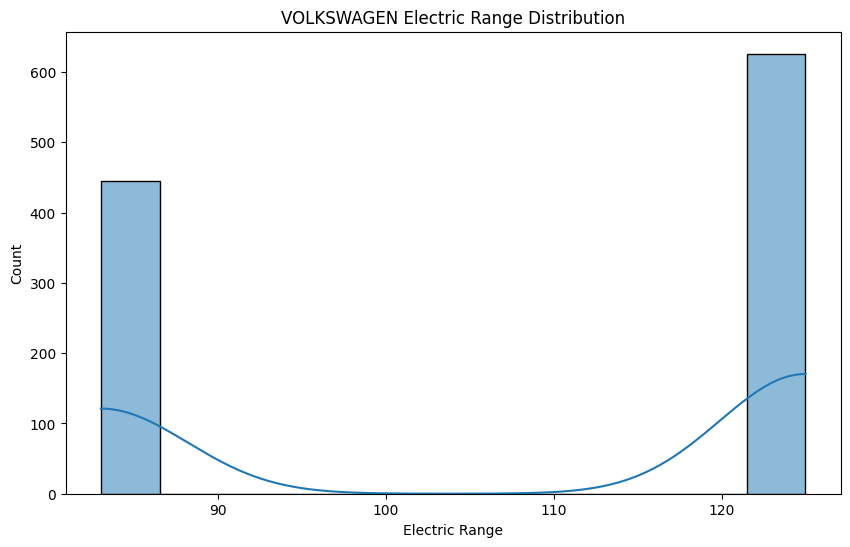

In [53]:
top_5_make = top_make(df[df['Models per make']>1],'mean',5)["Make"]

for make in top_5_make:
  data = df[df["Make"]== make]
  plt.figure(figsize=(10,6))
  plt.title(f"{make} Electric Range Distribution")
  sns.histplot(data=data, x="Electric Range",kde=True)
  plt.show()